In [15]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib as plt
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
csv_file = 'pokemon.csv'  # Replace 'your_file.csv' with the path to your CSV file

df = pd.read_csv(csv_file)
filtered_df = df[df['Generation'] == 1]
sorted_df = filtered_df.sort_values(by='Name')
print(sorted_df.shape)

label_dict = dict(zip(df['Name'], df['#']))
print(label_dict)

(166, 13)
{'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'VenusaurMega Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'CharizardMega Charizard X': 6, 'CharizardMega Charizard Y': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'BlastoiseMega Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'BeedrillMega Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'PidgeotMega Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran♀': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran♂': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian':

In [12]:
# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 20
num_classes = len(label_dict)

In [13]:
# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation sets
)

In [14]:
# Load and preprocess training and validation data
train_generator = train_datagen.flow_from_directory(
    './pokemon_gen1_dbs/',  # Directory containing subfolders for each Pokemon
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify training subset
)


Found 759 images belonging to 4 classes.


In [15]:
validation_generator = train_datagen.flow_from_directory(
    './pokemon_gen1_dbs/',  # Same directory as training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 188 images belonging to 4 classes.


In [16]:
path = './pokemon_gen1_dbs/'
integer_labels = []

for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Check if the folder name exists in label_dict
        if folder_name in label_dict:
            integer_value = label_dict[folder_name]
            integer_labels.append(integer_value)
        else:
            print(f"Ignoring folder '{folder_name}' as it does not have a corresponding label in label_dict.")

print("Integer List:", integer_labels)

Integer List: [1, 4, 43, 25]


In [17]:
integer_labels = [0,1,2,3]
num_classes = len(set(integer_labels))

one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

# Update model output layer to match the number of classes
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Update output layer units
])

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20


 8/23 [=========>....................] - ETA: 5s - loss: 1.3709 - accuracy: 0.3398

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 12s 493ms/step - loss: 1.1856 - accuracy: 0.4608 - val_loss: 0.7517 - val_accuracy: 0.6812
Epoch 2/20
23/23 [==============================] - 8s 351ms/step - loss: 0.7566 - accuracy: 0.7001 - val_loss: 0.5630 - val_accuracy: 0.8188
Epoch 3/20
23/23 [==============================] - 8s 358ms/step - loss: 0.5960 - accuracy: 0.7950 - val_loss: 0.3657 - val_accuracy: 0.8687
Epoch 4/20
23/23 [==============================] - 8s 352ms/step - loss: 0.5572 - accuracy: 0.8019 - val_loss: 0.3569 - val_accuracy: 0.8687
Epoch 5/20
23/23 [==============================] - 8s 351ms/step - loss: 0.5062 - accuracy: 0.8308 - val_loss: 0.3289 - val_accuracy: 0.8813
Epoch 6/20
23/23 [==============================] - 8s 350ms/step - loss: 0.4678 - accuracy: 0.8363 - val_loss: 0.2478 - val_accuracy: 0.9187
Epoch 7/20
23/23 [==============================] - 8s 351ms/step - loss: 0.4055 - accuracy: 0.8707 - val_loss: 0.2422 - val_accuracy: 0.9000
Epoch 8/20
23/23

In [20]:
evaluation = model.evaluate(validation_generator)
print(f"Validation Accuracy: {evaluation[1]}")

6/6 [==============================] - 2s 278ms/step - loss: 0.1251 - accuracy: 0.9628
Validation Accuracy: 0.9627659320831299


In [21]:
model.save("pokemon_gen1_classifier.h5")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Load saved model
loaded_model = load_model('pokemon_gen1_classifier.h5')

# Define a function to preprocess images
def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

In [27]:
# Example usage: Load and preprocess an unseen image
unseen_image_path = './test_img/bulb.png'
preprocessed_image = preprocess_image(unseen_image_path)

In [28]:
path = './pokemon_gen1_dbs/'
new_labels = []

for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Check if the folder name exists in label_dict
        if folder_name in label_dict:
            integer_value = label_dict[folder_name]
            new_labels.append(integer_value)
        else:
            print(f"Ignoring folder '{folder_name}' as it does not have a corresponding label in label_dict.")

print("Integer List:", new_labels)

Integer List: [1, 4, 43, 25]


In [29]:
index_mapping = {}
for i, label_index in enumerate(new_labels):
    index_mapping[i] = label_index

print(index_mapping)

{0: 1, 1: 4, 2: 43, 3: 25}


In [30]:
def get_key_from_value(dictionary, target_value):
    for key, value in dictionary.items():
        if value == target_value:
            return key
    return None

In [31]:
# Make predictions on the preprocessed image
predictions = loaded_model.predict(preprocessed_image)

# Get the predicted class label
predicted_class = np.argmax(predictions)
predicted_label_value = index_mapping[predicted_class]

predicted_pokemon = get_key_from_value(label_dict, predicted_label_value)
print(f"Predicted Pokemon: {predicted_pokemon}")

1/1 [==============================] - 0s 17ms/step
Predicted Pokemon: Bulbasaur


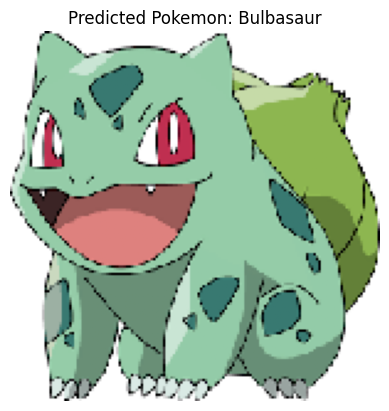

In [32]:
plt.imshow(preprocessed_image[0])
plt.title(f"Predicted Pokemon: {predicted_pokemon}")
plt.axis('off')
plt.show()